In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)

In [2]:
df = pd.read_csv('data/citibike_ZIP.csv')
df.head()

,tripduration,starttime,stoptime,start_id,start_name,start_lat,start_lon,end_id,end_name,end_lat,end_lon,bikeid,usertype,birth_year,gender,weekday,hour,geometry,zip_start,zip_end
0,17.700000,2020-06-01 00:00:03.372,2020-06-01 00:17:46.208,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,0,0,POINT (989370.1838770027 186756.53892500512),11217,11217.0
1,63.500000,2020-06-01 00:00:03.553,2020-06-01 01:03:33.936,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,0,0,POINT (992875.4144866021 191851.65323921342),11205,10012.0
2,16.950000,2020-06-01 00:00:09.614,2020-06-01 00:17:06.833,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,0,0,POINT (993883.8241576733 198112.87322040228),11249,11238.0
3,3.766667,2020-06-01 00:00:12.178,2020-06-01 00:03:58.864,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,0,0,POINT (985722.6805079061 212735.19209770544),10001,10001.0
4,23.950000,2020-06-01 00:00:21.255,2020-06-01 00:24:18.965,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,0,0,POINT (992368.8021711168 215540.1540624901),10022,10003.0


In [4]:
df.shape #1.86 million

(1863447, 20)

In [5]:
# exploration of station usage

start_count = df.groupby(['start_id'], as_index=False)['bikeid'].count()
start_count.columns = ['start_id','start_count']
start_count.head()

,start_id,start_count
0,72,5507
1,79,1521
2,82,1177
3,83,2342
4,116,4271


In [14]:
len(np.unique(df['start_id'])) # 958 total stations

958

In [5]:
start_count['start_count'].sum()

1863447

In [6]:
# station usage ranges from 12 to 12170 per month
start_count['start_count'].describe()

count      958.000000
mean      1945.143006
std       1748.268353
min         12.000000
25%        703.250000
50%       1408.000000
75%       2721.750000
max      12170.000000
Name: start_count, dtype: float64

In [7]:
# trip duration ranges from 1 to 132 mins
pd.options.display.float_format = '{:.2f}'.format
df[['tripduration']].describe()

,tripduration
count,1863447.00
mean,20.92
std,16.79
min,1.02
25%,9.00
50%,16.95
75%,28.18
max,132.43


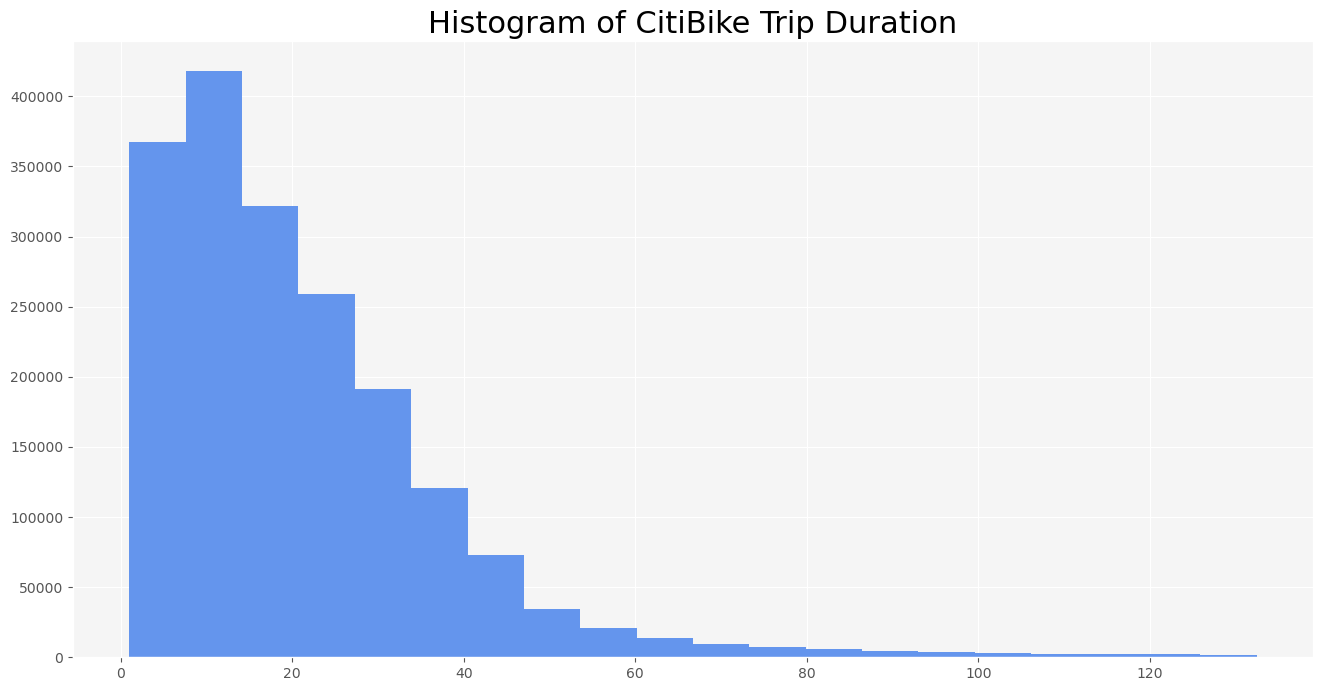

In [11]:
# histogram of trip duration
fig, ax = plt.subplots(figsize=(16,8)) # w x h
plt.hist(x = df['tripduration'], bins = 20, color = 'cornflowerblue')

plt.title('Histogram of CitiBike Trip Duration', fontsize = 22)
ax.set_facecolor("whitesmoke")

In [12]:
# trip average for individual stations range from 12 - 38 mins
station_trip = df.groupby(['start_id'], as_index=False)['tripduration'].mean()
station_trip.sort_values(by = 'tripduration')

,start_id,tripduration
5,119,12.770007
163,421,14.542025
229,504,14.830015
703,3680,15.065141
170,435,15.078112
...,...,...
659,3599,33.871896
554,3477,34.065033
932,3992,34.484847
903,3939,35.320664


In [17]:
# exploration of user information

df['age'] = 2020 - df['birth_year']
pd.options.display.float_format = '{:.2f}'.format
df['age'].describe()

count   1863447.00
mean         38.54
std          12.20
min          16.00
25%          29.00
50%          35.00
75%          51.00
max         147.00
Name: age, dtype: float64

In [25]:
df['gender'].value_counts()
# 0 = unknown, 1 = male, 2 = female
# 2x as many males as females

1    1038858
2     581536
0     243053
Name: gender, dtype: int64

In [29]:
df['usertype'].value_counts()
# 2x as many subscribers as customers

usertype  
Subscriber    1302353
Customer       561094
dtype: int64

In [32]:
user = df.groupby('usertype', as_index = False)[['tripduration']].mean()
user
# customers use bikes for longer

,usertype,tripduration
0,Customer,27.05
1,Subscriber,18.28


In [21]:
# exploration of usage by day of the week and time of day
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [22]:
# remove last two days of month so that there are equal counts of each day of the week
df_avg = df[df['starttime'].dt.day < 29]

In [23]:
# group total trip count by day of the week
trip_day = df_avg.groupby('weekday', as_index = False)[['starttime']].count()
trip_day.columns = ['weekday','total']
trip_day

,weekday,total
0,0,229084
1,1,238642
2,2,220795
3,3,213403
4,4,255941
5,5,281892
6,6,297739


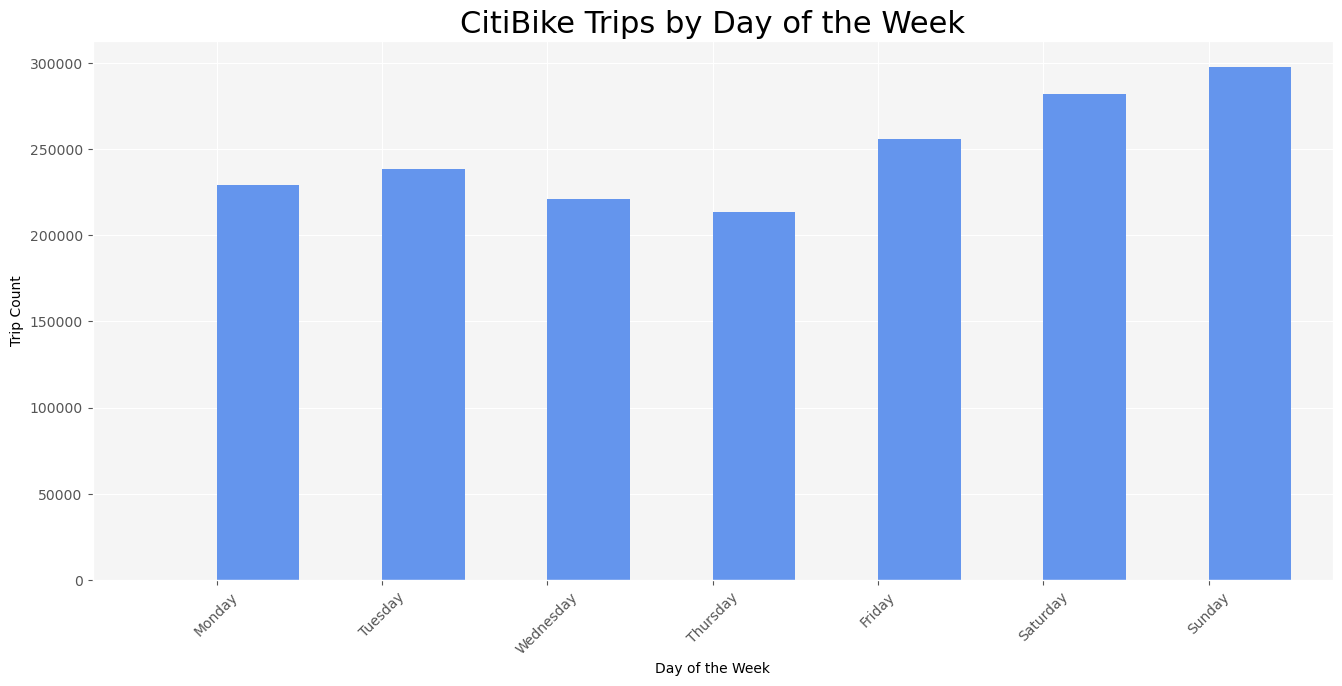

In [33]:
# bar graph for trip starts by day of the week
ax = trip_day.plot(kind='bar', width=1, color = 'cornflowerblue', figsize=(16,7), legend = False)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Trip Count")
ax.set_xticks([0, 1, 2, 3, 4, 5, 6], 
              ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], 
              rotation = 45)

plt.title('CitiBike Trips by Day of the Week', fontsize = 22)
ax.set_facecolor("whitesmoke")

In [26]:
# group trip counts by hour of day
trip_hr = df_avg.groupby('hour')[['starttime']].count()
trip_hr

,starttime
hour,
0,15403
1,9020
2,5141
3,3049
4,2707
5,8404
6,28249
7,48607
8,65898


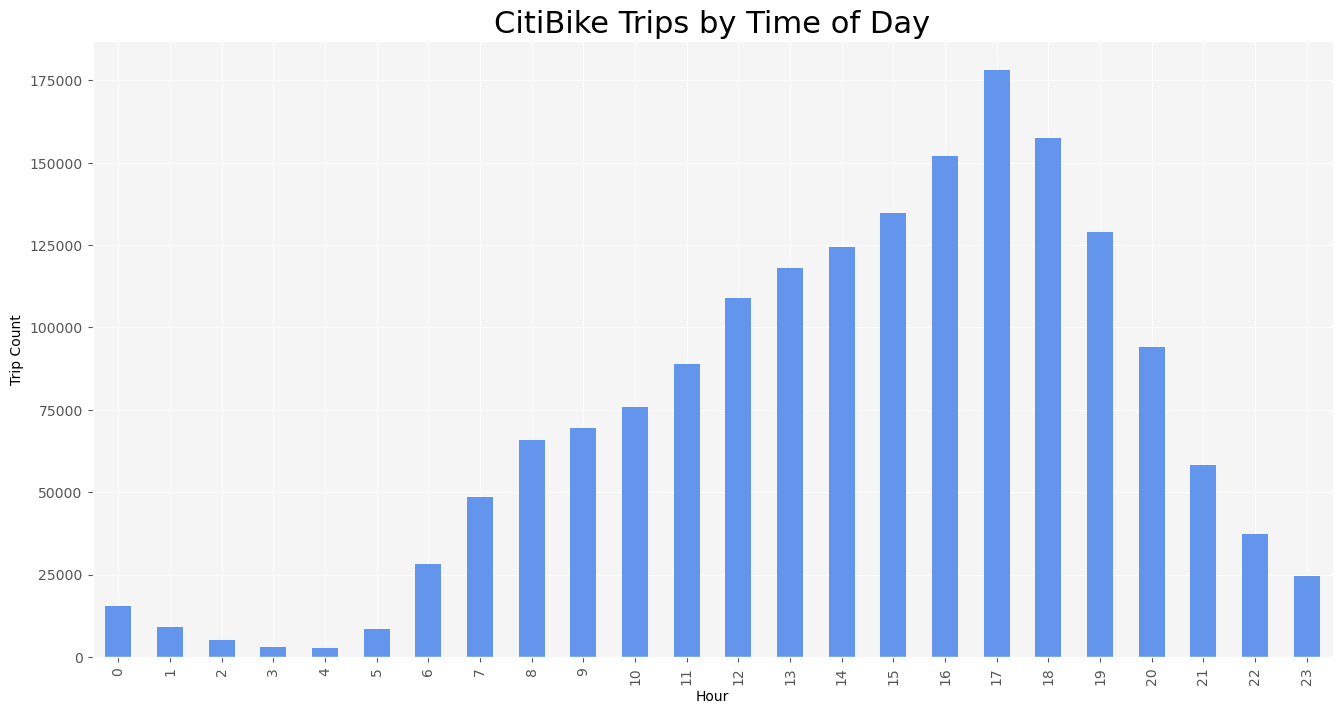

In [27]:
# bar graph for trip starts by time of day
ax = trip_hr.plot(kind='bar', color = 'cornflowerblue', figsize=(16,8), legend = False)
ax.set_xlabel("Hour")
ax.set_ylabel("Trip Count")

plt.title('CitiBike Trips by Time of Day', fontsize = 22)
ax.set_facecolor("whitesmoke")

In [28]:
# compare weekdays vs weekends
weekdays = df_avg[df_avg['weekday'] < 5]
weekends = df_avg[df_avg['weekday'] > 4]

In [29]:
trips_week = weekdays.groupby('hour', as_index = False)[['starttime']].count()
trips_week.columns = ['hour','count']
trips_week['avg_week'] = trips_week['count']/20
trips_week

,hour,count,avg_week
0,0,8268,413.40
1,1,4523,226.15
2,2,2753,137.65
3,3,1696,84.80
4,4,1801,90.05
5,5,6710,335.50
6,6,23982,1199.10
7,7,40508,2025.40
8,8,52608,2630.40
9,9,49150,2457.50


In [30]:
trips_weekend = weekends.groupby('hour', as_index = False)[['starttime']].count()
trips_weekend.columns = ['hour','count']
trips_weekend['avg_weekend'] = trips_weekend['count']/8
trips_weekend

,hour,count,avg_weekend
0,0,7135,891.88
1,1,4497,562.12
2,2,2388,298.50
3,3,1353,169.12
4,4,906,113.25
5,5,1694,211.75
6,6,4267,533.38
7,7,8099,1012.38
8,8,13290,1661.25
9,9,20389,2548.62


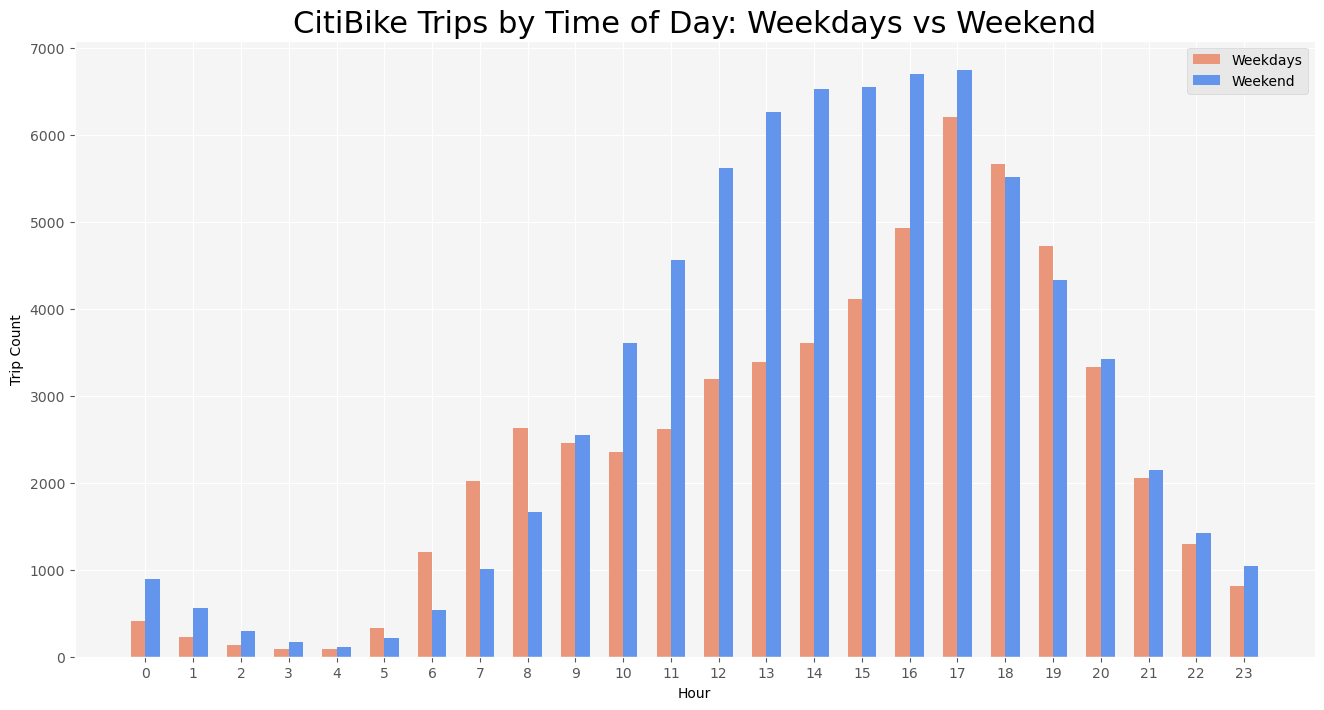

In [31]:
# bar plot of trips on weekdays vs. weekends by time of day
fig, ax = plt.subplots(figsize=(16,8))

x = np.arange(24)
plt.bar(x-.15, trips_week['avg_week'], width = 0.3, color = 'darksalmon')
plt.bar(x+.15, trips_weekend['avg_weekend'], width = 0.3, color = 'cornflowerblue')

plt.xticks(x)
plt.xlabel("Hour")
plt.ylabel("Trip Count")
plt.legend(["Weekdays", "Weekend"])

plt.title('CitiBike Trips by Time of Day: Weekdays vs Weekend', fontsize = 22)
ax.set_facecolor("whitesmoke")